In [ ]:
'''
Documentation:
Topic: To train a linear regression model to predict the number of COVID-19 cases from given features.
Dataset: https://github.com/Ayushijain09/Regression-on-COVID-dataset/blob/master/COVID-19_Daily_Testing.csv
Methodology:
Part 1: 
Read and parse the initial dataset
Load and check the data
Display the dataset with feature information
Remove unwanted features
Part 2: 
Create linear regression model
Part 3: 
Train and evaluate a linear regression model
Visualization 3: Predicted vs. actual
Visualization 4: Training error
Using different boosting algorithms to lower the MAE,RMSE 
'''

In [13]:
#importing the libraries
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

df=pd.read_csv('COVID-19_Daily_Testing.csv')
df.info()
df.drop(df.iloc[:,4:],inplace=True,axis=1) #removing all columns except first 4
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Date                                          88 non-null     object
 1   Day                                           88 non-null     object
 2   Tests                                         89 non-null     object
 3   Cases                                         89 non-null     object
 4   People Not-Positive - Total                   89 non-null     object
 5   People Tested - Age 0-17                      89 non-null     int64 
 6   People Tested - Age 18-29                     89 non-null     object
 7   People Tested - Age 30-39                     89 non-null     object
 8   People Tested - Age 40-49                     89 non-null     int64 
 9   People Tested - Age 50-59                     89 non-null     int64 
 10  Peop

,Date,Day,Tests,Cases
0,03-01-20,Sunday,1,0
1,05-02-20,Saturday,"2,431",705
2,05/14/2020,Thursday,"4,098",772
3,03-05-20,Thursday,17,1
4,03-06-20,Friday,18,3


In [14]:
print('After dropping all unwanted features (date and day):')
df.drop(df.iloc[:,0:2],inplace=True,axis=1)
for i in df.columns:
    df[i]=df[i].str.replace(',','') #removing the ','
    df[i]=pd.to_numeric(df[i]) #converting the string to integer
print(df.info())
print(df.head()) #now dataset has only cases and tests columns

X=df.drop('Cases',axis=1)
y=df.Cases

After dropping all unwanted features (date and day):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Tests   89 non-null     int64
 1   Cases   89 non-null     int64
dtypes: int64(2)
memory usage: 1.5 KB
None
   Tests  Cases
0      1      0
1   2431    705
2   4098    772
3     17      1
4     18      3


In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) # split X and y into training and testing sets
regressor=LinearRegression()
model=regressor.fit(X_train,y_train)

print('intercept:',model.intercept_)
print('slope:',model.coef_)

y_pred=regressor.predict(X_test)

intercept: 114.24000752798025
slope: [0.17432244]


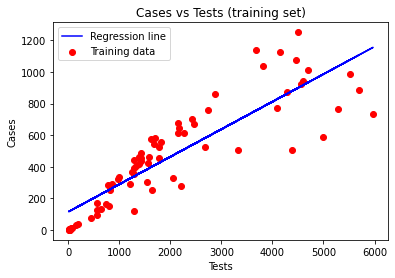

In [4]:
#Visualising the training set results
plt.scatter(X_train,y_train,color='red',label='Training data')
plt.plot(X_train,regressor.predict(X_train),color='blue',label='Regression line')
plt.legend()
plt.title('Cases vs Tests (training set)')
plt.xlabel('Tests')
plt.ylabel('Cases')
plt.show()

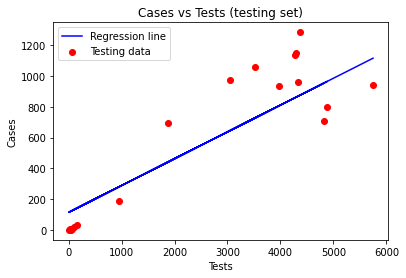

In [5]:
#Visualising the test set results
plt.scatter(X_test,y_test,color='red',label='Testing data')
plt.plot(X_test,y_pred,color='blue',label='Regression line')
plt.legend()
plt.title('Cases vs Tests (testing set)')
plt.xlabel('Tests')
plt.ylabel('Cases')
plt.show()

In [6]:
#error and predictions for testing data:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test, y_pred)
l1=['LR',mae,mse,rmse,r2]

In [7]:
#Using Gradient Boosting Algorithm (GBoost)
#Creating the model on Training Data (GB_model= GBoost model)
GB_regressor = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05)
GB_model = GB_regressor.fit(X_train, y_train)
y_pred_GB = GB_model.predict(X_test)

#error and predictions for testing data with GBoost:
mae = metrics.mean_absolute_error(y_test, y_pred_GB)
mse = metrics.mean_squared_error(y_test, y_pred_GB)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test, y_pred_GB)
l2=['LR+GB',mae,mse,rmse,r2]

In [8]:
#Using Adaboost Regression   
#Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=1)
AB_regressor = AdaBoostRegressor(n_estimators=50, base_estimator=DTR ,learning_rate=1)
 
#Creating the model on Training Data (AB_model= AdaBoost model)
AB_model=AB_regressor.fit(X_train,y_train)
y_pred_AB=AB_model.predict(X_test)

#error and predictions for testing data with AdaBoost:
mae = metrics.mean_absolute_error(y_test, y_pred_AB)
mse = metrics.mean_squared_error(y_test, y_pred_AB)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test, y_pred_AB)
l3=['LR+AB',mae,mse,rmse,r2]

In [9]:
#Using XGBoost 
#Creating the model on Training Data (XGB_model= XGBoost model)
XGB_regressor = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
XGB_model= XGB_regressor.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)
y_pred_XGB=XGB_model.predict(X_test)

#error and predictions for testing data with XGBoost:
mae = metrics.mean_absolute_error(y_test, y_pred_XGB)
mse = metrics.mean_squared_error(y_test, y_pred_XGB)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test, y_pred_XGB)
l4=['LR+XGB',mae,mse,rmse,r2]

In [10]:
#Using CatBoost 
#Creating the model on Training Data (CB_model= CatBoost model)
CB_regressor = CatBoostRegressor(n_estimators=1000, learning_rate=0.05)
CB_model= CB_regressor.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)
y_pred_CB=CB_model.predict(X_test)

#error and predictions for testing data with CatBoost:
mae = metrics.mean_absolute_error(y_test, y_pred_CB)
mse = metrics.mean_squared_error(y_test, y_pred_CB)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test, y_pred_CB)
l5=['LR+CB',mae,mse,rmse,r2]

In [11]:
#Using LightGBM
#Creating the model on Training Data (LGBM_model= LightGBM model)
LGBM_regressor = LGBMRegressor(n_estimators=1000, n_jobs=4)
LGBM_model= LGBM_regressor.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_pred_LGBM=LGBM_model.predict(X_test)

#error and predictions for testing data with LightGBM:
mae = metrics.mean_absolute_error(y_test, y_pred_LGBM)
mse = metrics.mean_squared_error(y_test, y_pred_LGBM)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test, y_pred_LGBM)
l6=['LR+LGBM',mae,mse,rmse,r2]

[1]	valid_0's l2: 212852
[2]	valid_0's l2: 186289
[3]	valid_0's l2: 169441
[4]	valid_0's l2: 149840
[5]	valid_0's l2: 132852
[6]	valid_0's l2: 118919
[7]	valid_0's l2: 106730
[8]	valid_0's l2: 96032.1
[9]	valid_0's l2: 89748.8
[10]	valid_0's l2: 81640.2
[11]	valid_0's l2: 74983.2
[12]	valid_0's l2: 69091.4
[13]	valid_0's l2: 64228.1
[14]	valid_0's l2: 61116.6
[15]	valid_0's l2: 57363.6
[16]	valid_0's l2: 54130.6
[17]	valid_0's l2: 51338.2
[18]	valid_0's l2: 48775.3
[19]	valid_0's l2: 46680.5
[20]	valid_0's l2: 44840.6
[21]	valid_0's l2: 43138.2
[22]	valid_0's l2: 41654.4
[23]	valid_0's l2: 40746.7
[24]	valid_0's l2: 39556.4
[25]	valid_0's l2: 38512.7
[26]	valid_0's l2: 37643
[27]	valid_0's l2: 37057.1
[28]	valid_0's l2: 36309.1
[29]	valid_0's l2: 35648.9
[30]	valid_0's l2: 35093.7
[31]	valid_0's l2: 34572.6
[32]	valid_0's l2: 34132.7
[33]	valid_0's l2: 33720.5
[34]	valid_0's l2: 33371.7
[35]	valid_0's l2: 33058
[36]	valid_0's l2: 32764.1
[37]	valid_0's l2: 32519.6
[38]	valid_0's l2: 32

In [12]:
print('Error and accuracy with testing data:')
l=[l1,l2,l3,l4,l5,l6]
out=pd.DataFrame(l,columns=['MODEL','MAE','MSE','RMSE','R^2'])
out.sort_values(by=['RMSE'])

Error and accuracy with testing data:


,MODEL,MAE,MSE,RMSE,R^2
4,LR+CB,128.354829,27641.753061,166.258092,0.878408
5,LR+LGBM,147.816380,30253.962607,173.936663,0.866917
0,LR,193.242360,46690.830222,216.080610,0.794613
3,LR+XGB,158.834656,49270.238507,221.969003,0.783267
1,LR+GB,166.397007,65451.518835,255.834945,0.712087
2,LR+AB,239.946849,70850.648314,266.177851,0.688337
